In [1]:
from random import uniform
from math import sqrt
from queue import PriorityQueue

In [2]:
def euclidean_distance(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [3]:
class EventHandler:
    def __init__(self):
        self.events = PriorityQueue()
        
    def addEvent(self, e):
        self.events.put(e)
    
    def getEvent(self):
        return self.events.get()
    
    def isEmpty(self):
        return self.events.empty()

In [15]:
class Node:
    def __init__(self, maxX, maxY, minS, maxS):
        self.maxX = maxX
        self.maxY = maxY
        self.maxS = maxS
        self.minS = minS
        self.last_waypoint = -1
        self.getNewCoords()
        self.getNewWaypoint()
        self.getNewSpeed()
        
    def getNewCoords(self):
        self.x = uniform(0, self.maxX)
        self.y = uniform(0, self.maxY)
        
    def getNewWaypoint(self):
        self.next_waypoint_x = uniform(0, self.maxX)
        self.next_waypoint_y = uniform(0, self.maxY)
        
    def getNewSpeed(self):
        self.speed = uniform(self.minS, self.maxS)
        
    def getTimeNeeded(self):
        d = euclidean_distance((self.x, self.y), (self.next_waypoint_x, self.next_waypoint_y))
        return d / self.speed
    
    def arrived(self):
        self.x = self.next_waypoint_x
        self.y = self.next_waypoint_y
        self.getNewWaypoint()
        self.getNewSpeed()

In [302]:
class Simulation:
    def __init__(self, N, maxX, maxY, minS, maxS, time_measure):
        self.events = EventHandler()
        self.N = N
        self.maxX = maxX
        self.maxY = maxY
        self.maxS = maxS
        self.minS = minS
        self.time_measure = time_measure
        self.nodes = []
        self.events.addEvent((0, "init", -1))
        
    def init_event_handler(self):
        for n in range(self.N):
            self.nodes.append(Node(self.maxX, self.maxY, self.maxS, self.minS))
            self.events.addEvent((self.nodes[n].getTimeNeeded(), "waypoint_reached", n))
            
        self.events.addEvent((self.time_measure, 'measure_speed', -1))
        self.events.addEvent((9000, 'stop', -1))
                              
    def measure_speed(self, t):
        s = 0
        for node in self.nodes:
            s += node.speed
            
        self.events.addEvent((t + self.time_measure, 'measure_speed', -1))
        return s / self.N
    
    def waypoint_reached(self, i, t):
        self.nodes[i].arrived()
        self.events.addEvent((t + self.nodes[i].getTimeNeeded(), "waypoint_reached", i))
        
    def simulate(self):
        t = 0
        measures = []
        while True:
            event_time, event_type, event_node = self.events.getEvent()
            t = event_time
            if event_type == 'measure_speed':
                avg_speed = self.measure_speed(t)
                measures.append(avg_speed)
            elif event_type == 'init':
                self.init_event_handler()
            elif event_type == 'stop':
                break
            else:
                self.waypoint_reached(event_node, t)
        
        self.measures = measures
    
    def plot(self):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10,5))
        plt.plot(self.measures)
        plt.show()

https://www.netlab.tkk.fi/~esa/java/rwp/rwp-model.shtml

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.12.9474&rep=rep1&type=pdf

In [308]:
def run_set(N_sim, v_min):
    import numpy as np
    measures = None

    for i in range(N_sim):
        sim = Simulation(1, 100, 100, v_min, 10, 50)
        sim.simulate()
        m = np.array(sim.measures)
        
        if measures is None:
            measures = m
        else:
            measures += m

    measures /= N_sim
    return measures

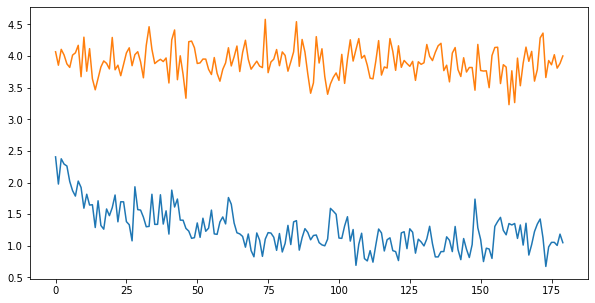

In [309]:
def compare():
    def plot(measures0, measures1):
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10,5))
        plt.plot(measures0, label='v_max [0, 10]')
        plt.plot(measures1, label='v_max [1, 10]')
        plt.show()
    
    measures0 = run_set(100, 0)
    measures1 = run_set(100, 1)
    plot(measures0, measures1)
    
compare()